In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
from sklearn.linear_model import LinearRegression
folder = os.getcwd() + '/'

# 4.6 Training, test and MSE's - solution

## 4.6.1 Task 6

Open the data file units_sold.csv. You will find 100 recordings of how much units a certain shops sells and how much hours of training the staff received.
- Use the the first 80 data points as a training set. Test the result, with the last 20 data points as a test set. Report the MSE of both the training and test set.
- Repeat the previous question, but use 80 random datapoints as the training set and the other 20 data points (watch out for overlap!) data points as test set. What happened?

## 4.6.2 Solution

### 4.5.2.1 Import data and take a first look

In [2]:
sold = pd.read_csv(folder + 'data/units_sold.csv', index_col = 0)

In [3]:
sold.describe()

,sold,training
count,100.000000,100.000000
mean,51.138838,20.285715
std,17.827764,3.049421
min,11.653791,12.999469
25%,47.869730,18.155431
50%,56.408301,20.080521
75%,63.012890,22.112849
max,79.401775,27.776011


In [4]:
sold.sample(3)

,sold,training
52,49.271492,16.229027
27,70.366400,24.280990
14,54.091706,17.442298


In [5]:
sold.dtypes

sold        float64
training    float64
dtype: object

In [6]:
sold.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [7]:
sold.columns

Index(['sold', 'training'], dtype='object')

### 4.5.2.2 First 80 points as training set

In [8]:
#Use the the first 80 data points as a training set. 
#Test the result, with the last 20 data points as a test set. 
#Report the MSE of both the training and test set.
train = sold[:80]
test = sold[80:]

In [9]:
print(train.head(10))

         sold   training
1   54.090016  17.973110
2   58.508668  20.894466
3   78.289739  27.066276
4   54.429637  18.342155
5   58.200500  18.331571
6   55.610002  19.083920
7   59.593814  21.036453
8   61.224353  20.832367
9   48.129578  16.383628
10  79.401775  27.776011


In [10]:
print(test.head(10))

         sold   training
81  15.547442  17.361591
82  19.410383  20.032963
83  20.483922  21.481617
84  19.766275  20.522596
85  19.425578  21.709637
86  18.965035  17.605356
87  22.185855  24.648201
88  11.653791  14.502476
89  13.111241  16.775681
90  22.051706  22.154210


In [11]:
y_train = train.sold.values
x_train = train.training.values.reshape(-1,1)
myLR = LinearRegression()
myLR.fit(X = x_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
x_test = test.training.values
myLR.predict(x_test.reshape(-1,1))

array([51.61899285, 58.77922993, 62.66214244, 60.09162114, 63.27331688,
       52.27236885, 71.14972444, 43.9555371 , 50.04854151, 64.46493415,
       58.15901756, 74.53970188, 74.81202871, 77.97274638, 60.26069884,
       51.20338283, 72.6785648 , 63.55057937, 58.8694286 , 55.53272186])

In [13]:
y_test = test.sold.values
y_test

array([15.54744202, 19.41038258, 20.48392198, 19.76627534, 19.42557793,
       18.96503492, 22.18585475, 11.65379143, 13.11124062, 22.05170646,
       18.70632951, 22.62040632, 24.8780784 , 27.1681929 , 20.52261969,
       16.60623558, 22.33791489, 19.19975666, 19.4524492 , 20.01618987])

In [14]:
#Report the MSE of both the training and test set.
from sklearn.metrics import mean_squared_error
#train
#y_true = y_train
y_true = train.sold.values
y_pred = myLR.predict(x_train.reshape(-1,1))
print(mean_squared_error(y_true, y_pred))

#test
y_true = test.sold.values
y_pred = myLR.predict(x_test.reshape(-1,1))
print(mean_squared_error(y_true, y_pred))

20.397447495809867
1765.5658526197572


**Conclusion: train and test set MUST be randomly mixed, values differ too much from both sets!**

### 4.5.2.3 Random 80 points as training set

In [15]:
#making the test set larger (from 20% to 40%)
test = sold[60:]
x_test = test.training.values

In [16]:
#Repeat the previous question, but use 80 random datapoints as the training set a
#and the other 20 data points (watch out for overlap!) data points as test set. 
#What happened?
from sklearn.model_selection import train_test_split
train, test = train_test_split(sold, test_size=0.4)

In [17]:
y_train = train.sold.values
x_train = train.training.values.reshape(-1,1)
myLR = LinearRegression()
myLR.fit(X = x_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#Report the MSE of both the training and test set.
from sklearn.metrics import mean_squared_error
#train
y_true = y_train
y_pred = myLR.predict(x_train.reshape(-1,1))
print(mean_squared_error(y_true, y_pred))

#test
y_true = test.sold.values
y_pred = myLR.predict(x_test.reshape(-1,1))
print(mean_squared_error(y_true, y_pred))

254.1563264178825
399.4675968011073


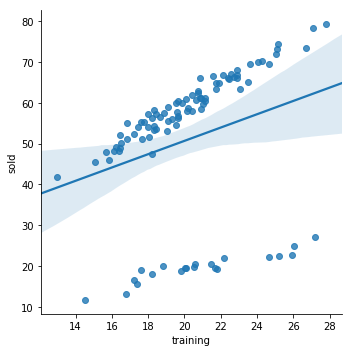

In [19]:
sns.lmplot('training', 'sold', data=sold)

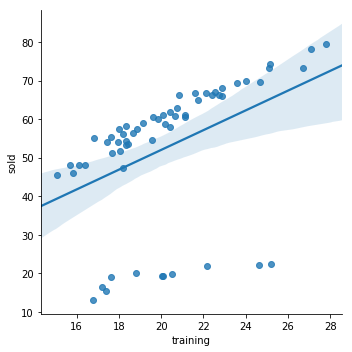

In [20]:
sns.lmplot('training', 'sold', data=train)

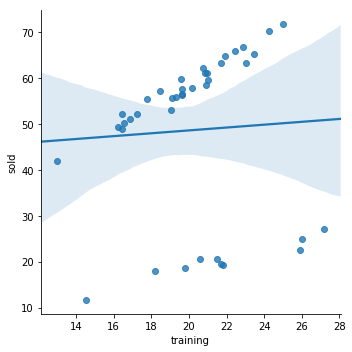

In [21]:
sns.lmplot('training', 'sold', data=test)

The first 80 data points are the upper points, with clear trend. The last 20 data points are the lower points, with a clear trend. With the first 80 as training set, we get a nice training fit (line through the upper points) and bad test set fit (this line doesn't go through the lower points). With 80 random as training set, we get both a bad training fit and test fit, as there is no clear linear trend in this data.